# EDA

## 1. Read data

- 569 row
- 32 columns(id, label, 30 features)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization

plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [2]:
data = pd.read_csv('_data/wdbc.data', header=-1) # no header
# data.drop(0, axis =1, inplace=True) # Drop the id column if you need.

- Make the column name

In [3]:
import re

feature_string = """
id,diagnosis,radius_mean,texture_mean,perimeter_mean,
area_mean,smoothness_mean,compactness_mean,concavity_mean,
concave points_mean,symmetry_mean,fractal_dimension_mean,
radius_se,texture_se,perimeter_se,area_se,smoothness_se,
compactness_se,concavity_se,concave points_se,symmetry_se,
fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,
area_worst,smoothness_worst,compactness_worst,concavity_worst,
concave points_worst,symmetry_worst,fractal_dimension_worst
"""
feature_string = re.sub('\n', '', feature_string)
features = feature_string.split(',')
data.columns = features

## 2. Properties

In [4]:
len(data)

569

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## 3. Check outliers

Check outliers that bigger or smaller than 3 sigma value.

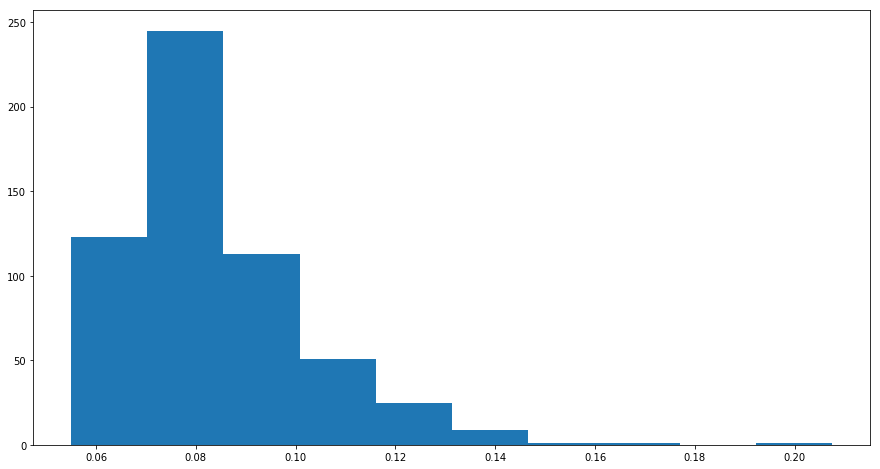

In [8]:
d = np.array(data.iloc[:, 31])
_ = plt.hist(d)

In [9]:
plt.close()

In [10]:
for i in range(2, 32):
    d = np.array(data.iloc[:, i])
    bigger_num = np.sum(d >= np.mean(d) + 3*np.std(d))
    smaller_num = np.sum(d <= np.mean(d) - 3*np.std(d))
    print('bigger: {}, smaller: {}'.format(bigger_num, smaller_num))

bigger: 5, smaller: 0
bigger: 4, smaller: 0
bigger: 7, smaller: 0
bigger: 8, smaller: 0
bigger: 4, smaller: 1
bigger: 9, smaller: 0
bigger: 9, smaller: 0
bigger: 6, smaller: 0
bigger: 5, smaller: 0
bigger: 7, smaller: 0
bigger: 7, smaller: 0
bigger: 9, smaller: 0
bigger: 8, smaller: 0
bigger: 6, smaller: 0
bigger: 7, smaller: 0
bigger: 12, smaller: 0
bigger: 6, smaller: 0
bigger: 6, smaller: 0
bigger: 11, smaller: 0
bigger: 10, smaller: 0
bigger: 6, smaller: 0
bigger: 4, smaller: 0
bigger: 6, smaller: 0
bigger: 10, smaller: 0
bigger: 3, smaller: 0
bigger: 10, smaller: 0
bigger: 7, smaller: 0
bigger: 0, smaller: 0
bigger: 9, smaller: 0
bigger: 9, smaller: 0
